In [2]:
import pandas as pd

# Load CSV files
df1 = pd.read_csv("api_data_aadhar_biometric_1.csv")
df2 = pd.read_csv("api_data_aadhar_biometric_2.csv")
df3 = pd.read_csv("api_data_aadhar_biometric_3.csv")
df4 = pd.read_csv("api_data_aadhar_biometric_4.csv")

# Combine row-wise
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Convert date column
combined_df['date'] = pd.to_datetime(combined_df['date'], dayfirst=True)

# Save combined file
combined_df.to_csv("combined_uidai_data.csv", index=False)

print("Files combined successfully")


Files combined successfully


In [3]:
combined_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
1,2025-03-01,Bihar,Madhepura,852121,144,369
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091
3,2025-03-01,Bihar,Bhojpur,802158,256,980
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815


In [4]:
df = pd.read_csv("combined_uidai_data.csv")



In [5]:
null_counts = df.isna().sum()
print(null_counts)


date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64


In [6]:
print(df.isna().any())


date            False
state           False
district        False
pincode         False
bio_age_5_17    False
bio_age_17_     False
dtype: bool


In [7]:
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)


Duplicate rows: 94896


In [8]:
df.duplicated(
    subset=['date', 'state', 'district', 'pincode']
).sum()


np.int64(94896)

In [9]:
duplicate_count = df.duplicated(
    subset=['date', 'state', 'district', 'pincode']
).sum()

print("Logical duplicate records:", duplicate_count)

# 4. Inspect duplicates (OPTIONAL but recommended)
duplicates = df[df.duplicated(
    subset=['date', 'state', 'district', 'pincode'],
    keep=False
)]

Logical duplicate records: 94896


In [10]:
print("Sample duplicate rows:")
print(duplicates.head())

Sample duplicate rows:
              date         state   district  pincode  bio_age_5_17  \
109994  2025-09-01  Chhattisgarh  Kondagaon   494229             0   
109995  2025-09-01  Chhattisgarh  Kondagaon   494230             1   
109996  2025-09-01  Chhattisgarh      Korba   495119             5   
109997  2025-09-01  Chhattisgarh      Korba   495446             0   
109998  2025-09-01  Chhattisgarh      Korba   495674            10   

        bio_age_17_  
109994            1  
109995            0  
109996           35  
109997           16  
109998           34  


In [13]:
df_clean = (
    df.groupby(
        ['date', 'state', 'district', 'pincode'],
        as_index=False
    )[['bio_age_5_17', 'bio_age_17_']]
    .sum()
)


In [16]:
df_clean = df.drop_duplicates(
    subset=['date', 'state', 'district', 'pincode'],
    keep='first'
)

# 6. Verify cleanup
print("Duplicates after cleanup:",
      df_clean.duplicated(
          subset=['date', 'state', 'district', 'pincode']
      ).sum()
)

Duplicates after cleanup: 0


In [17]:
df_clean.to_csv("clean_uidai_data.csv", index=False)

print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [18]:
import pandas as pd
import re

# Load cleaned CSV
df = pd.read_csv("clean_uidai_data.csv")

# Format column names
df.columns = (
    df.columns
      .str.strip()                    # remove extra spaces
      .str.lower()                    # lowercase
      .str.replace(' ', '_')          # spaces → underscores
      .str.replace('[^a-z0-9_]', '', regex=True)  # remove special chars
)

# Save final CSV
df.to_csv("final_uidai_data.csv", index=False)

print("Column names formatted and final CSV saved.")
print("Final columns:")
print(df.columns.tolist())


Column names formatted and final CSV saved.
Final columns:
['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


In [19]:
df = pd.read_csv("final_uidai_data.csv")

In [20]:
df.describe(include='all')


,date,state,district,pincode,bio_age_5_17,bio_age_17_
count,1766212,1766212,1766212,1.766212e+06,1.766212e+06,1.766212e+06
unique,89,57,974,NaN,NaN,NaN
top,2025-11-12,Tamil Nadu,Pune,NaN,NaN,NaN
freq,23994,174934,11068,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.217314e+05,1.894260e+01,1.970568e+01
std,NaN,NaN,NaN,1.983382e+05,8.581746e+01,9.030576e+01
min,NaN,NaN,NaN,1.100010e+05,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,3.911500e+05,1.000000e+00,1.000000e+00
50%,NaN,NaN,NaN,5.224390e+05,4.000000e+00,4.000000e+00
75%,NaN,NaN,NaN,6.866810e+05,1.100000e+01,1.000000e+01


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("final_uidai_data.csv")

# Quick look
print(df.head())
print(df.info())


         date              state      district  pincode  bio_age_5_17  \
0  2025-03-01            Haryana  Mahendragarh   123029           280   
1  2025-03-01              Bihar     Madhepura   852121           144   
2  2025-03-01  Jammu and Kashmir         Punch   185101           643   
3  2025-03-01              Bihar       Bhojpur   802158           256   
4  2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766212 entries, 0 to 1766211
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 80.9+ MB
None


In [2]:
df.describe()


,pincode,bio_age_5_17,bio_age_17_
count,1.766212e+06,1.766212e+06,1.766212e+06
mean,5.217314e+05,1.894260e+01,1.970568e+01
std,1.983382e+05,8.581746e+01,9.030576e+01
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.911500e+05,1.000000e+00,1.000000e+00
50%,5.224390e+05,4.000000e+00,4.000000e+00
75%,6.866810e+05,1.100000e+01,1.000000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03


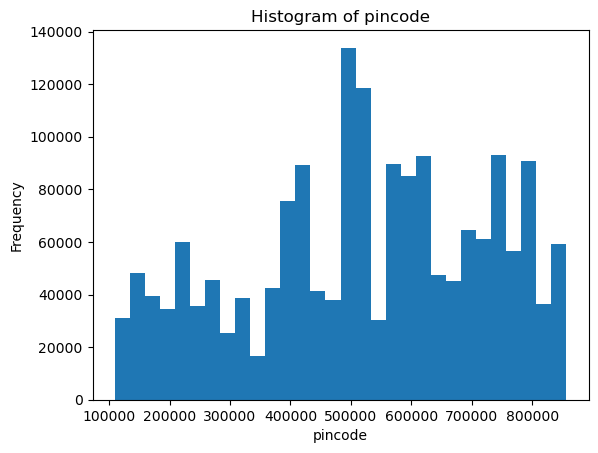

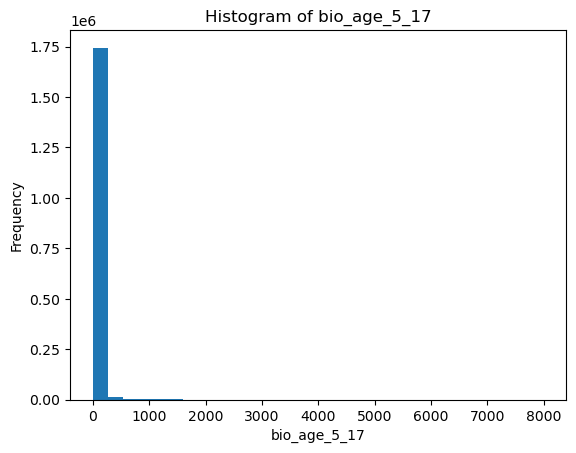

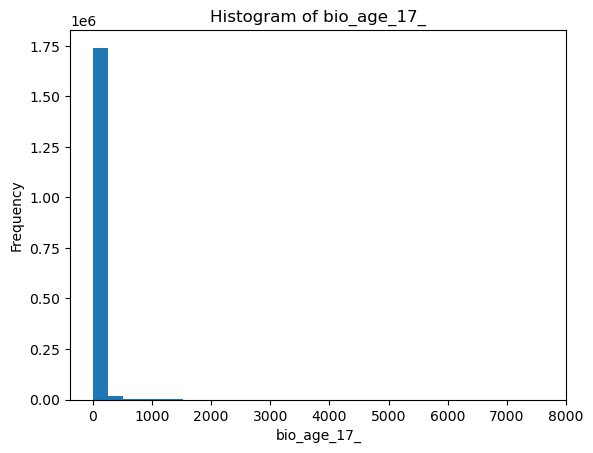

In [3]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


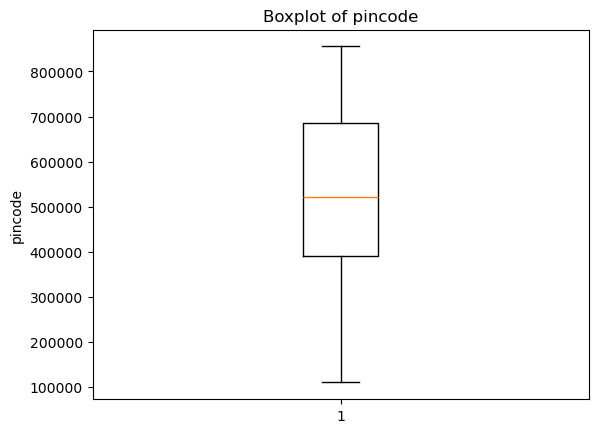

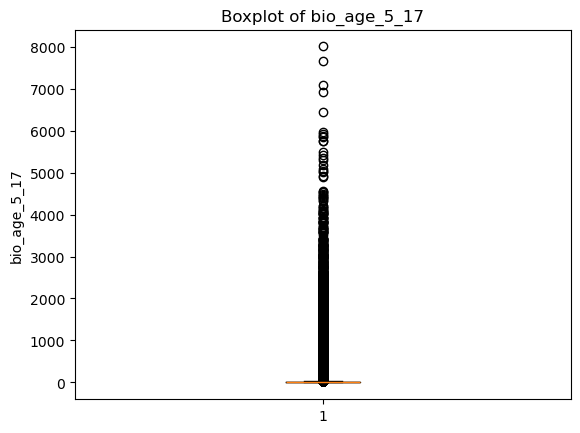

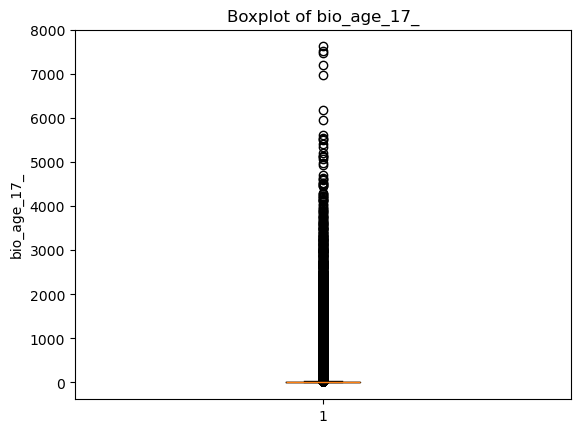

In [4]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [5]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\nValue counts for {col}")
    print(df[col].value_counts())



Value counts for date
date
2025-11-12    23994
2025-12-16    23650
2025-12-02    23599
2025-12-12    23544
2025-09-15    23450
              ...  
2025-10-23     4931
2025-10-13     2162
2025-10-22     1397
2025-12-23      280
2025-12-22       36
Name: count, Length: 89, dtype: int64

Value counts for state
state
Tamil Nadu                                  174934
Andhra Pradesh                              160202
Uttar Pradesh                               147138
Maharashtra                                 143609
Karnataka                                   135780
West Bengal                                 125274
Kerala                                       93951
Gujarat                                      84630
Odisha                                       83177
Bihar                                        78078
Telangana                                    77850
Rajasthan                                    76698
Madhya Pradesh                               66020
Punjab               

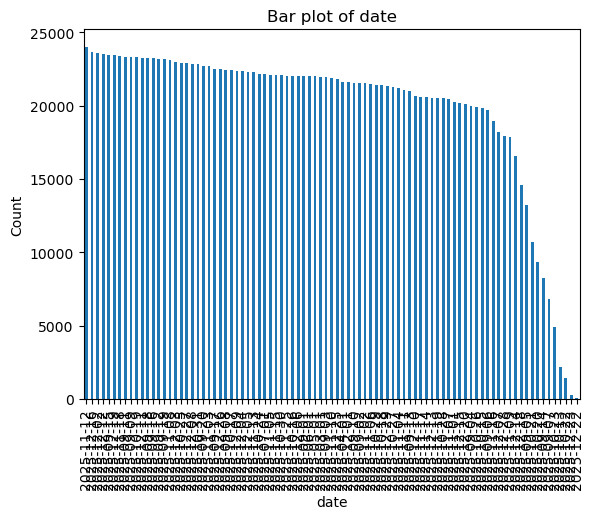

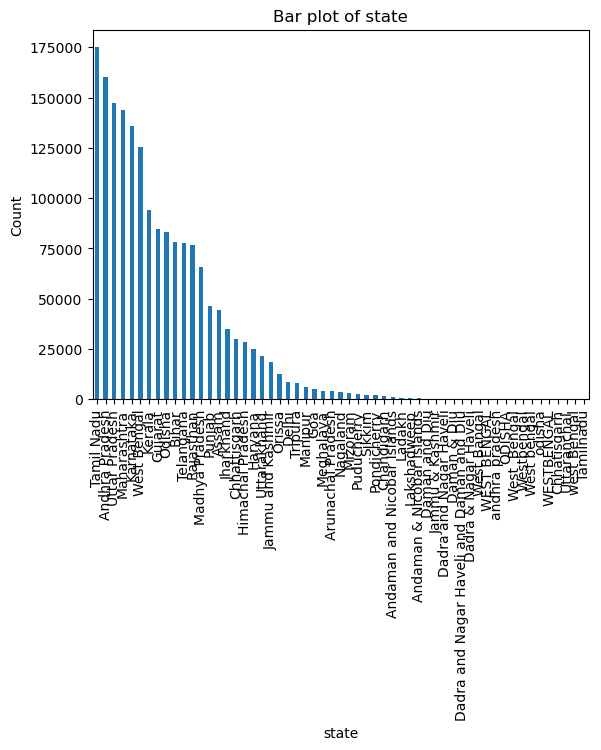

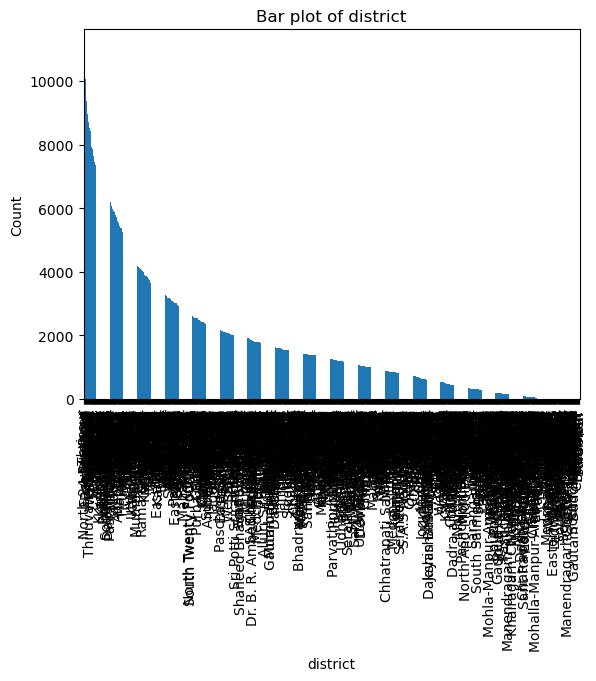

In [6]:
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [7]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64


In [8]:
for col in num_cols:
    print(f"{col} skewness:", df[col].skew())
    print(f"{col} kurtosis:", df[col].kurt())


pincode skewness: -0.27698037236939566
pincode kurtosis: -0.8736936409417004
bio_age_5_17 skewness: 18.880437248985846
bio_age_5_17 kurtosis: 676.044598376227
bio_age_17_ skewness: 17.645562073092357
bio_age_17_ kurtosis: 579.8762842060908


# PREPROCESSING


In [1]:
import pandas as pd
import numpy as np
import re

# Load dataset
df = pd.read_csv("final_uidai_data.csv")


In [2]:
def normalize_text(text):
    if pd.isna(text):
        return text
    text = text.lower().strip()
    text = re.sub(r'[^a-z\s]', '', text)   # remove special characters
    text = re.sub(r'\s+', ' ', text)       # remove extra spaces
    return text.title()

# Apply normalization
df['state'] = df['state'].apply(normalize_text)
df['district'] = df['district'].apply(normalize_text)


In [3]:
state_mapping = {
    'Orissa': 'Odisha',
    'Jammu Kashmir': 'Jammu And Kashmir',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu'
}

df['state'] = df['state'].replace(state_mapping)


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [5]:
print(df['date'].isna().sum())


0


# ANALYSIS


In [6]:
df.to_csv("final_uidai_data_cleaned.csv", index=False)


In [7]:
df = df.sort_values(['district', 'date'])

df['delta_5_17'] = df.groupby('district')['bio_age_5_17'].diff()
df['delta_17'] = df.groupby('district')['bio_age_17_'].diff()

# Count non-zero changes
non_zero_changes = df[
    (df['delta_5_17'] != 0) | (df['delta_17'] != 0)
]

print(f"Rows with actual change over time: {len(non_zero_changes)}")


Rows with actual change over time: 1701560


In [8]:
trend_summary = (
    df.groupby('district')
      .agg(
          mean_change_5_17=('delta_5_17', 'mean'),
          mean_change_17=('delta_17', 'mean')
      )
)

# Districts showing positive average growth
increasing_districts = trend_summary[
    (trend_summary['mean_change_5_17'] > 0) |
    (trend_summary['mean_change_17'] > 0)
]

print(f"Districts with upward trend: {increasing_districts.shape[0]}")


Districts with upward trend: 37


In [9]:
constant_districts = district_variation[
    (district_variation['bio_age_5_17'] == 1) &
    (district_variation['bio_age_17_'] == 1)
]

print(f"Districts with constant values across time: {constant_districts.shape[0]}")


NameError: name 'district_variation' is not defined

<Axes: title={'center': 'Biometric Trend in Pune'}, xlabel='date'>

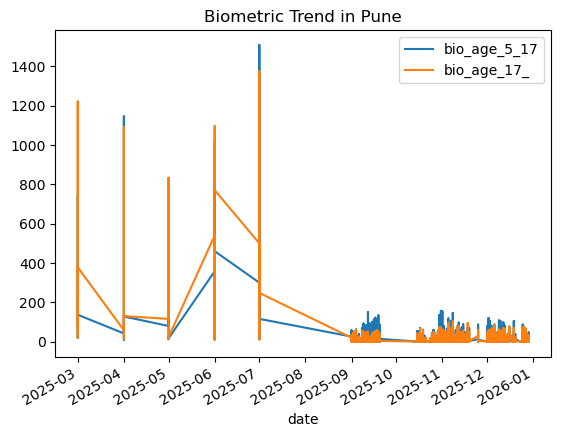

In [10]:
sample_district = df['district'].value_counts().index[0]

sample_df = df[df['district'] == sample_district]

sample_df.plot(
    x='date',
    y=['bio_age_5_17', 'bio_age_17_'],
    title=f"Biometric Trend in {sample_district}"
)


In [11]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['district', 'date'])


In [12]:
district_increase = (
    df.groupby('district')
      .agg(
          start_5_17=('bio_age_5_17', 'first'),
          end_5_17=('bio_age_5_17', 'last'),
          start_17=('bio_age_17_', 'first'),
          end_17=('bio_age_17_', 'last')
      )
)

district_increase['increase_5_17'] = (
    district_increase['end_5_17'] - district_increase['start_5_17']
)

district_increase['increase_17'] = (
    district_increase['end_17'] - district_increase['start_17']
)


In [13]:
top_5_17 = (
    district_increase
    .sort_values('increase_5_17', ascending=False)
    .head(10)
)

print(top_5_17[['increase_5_17']])


                              increase_5_17
district                                   
Ganderbal                                45
Ajmer                                    43
Baloda Bazar                             21
Kondagaon                                18
Hapur                                     8
Mohallamanpurambagarh Chowki              2
Sant Ravidas Nagar Bhadohi                2
Bulandshahar                              2
Dima Hasao                                2
Khawzawl                                  1


In [14]:
top_5_17 = (
    district_increase
    .sort_values('increase_17', ascending=False)
    .head(10)
)

print(top_5_17[['increase_17']])


                     increase_17
district                        
Gautam Buddha Nagar            9
Garhwal                        2
Gondia                         1
Lahaul And Spiti               1
Nicobars                       1
Hardwar                        1
Hawrah                         1
Udupi                          1
Jyotiba Phule Nagar            1
Mohali                         1


## UNIVARIATE ANALYSIS


In [15]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1766212 entries, 1180586 to 1764850
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
 6   delta_5_17    float64       
 7   delta_17      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 121.3+ MB


,date,pincode,bio_age_5_17,bio_age_17_,delta_5_17,delta_17
count,1766212,1.766212e+06,1.766212e+06,1.766212e+06,1.765268e+06,1.765268e+06
mean,2025-10-21 22:18:59.664773888,5.217314e+05,1.894260e+01,1.970568e+01,-9.072673e-02,-1.138178e-01
min,2025-03-01 00:00:00,1.100010e+05,0.000000e+00,0.000000e+00,-7.541000e+03,-6.975000e+03
25%,2025-09-17 00:00:00,3.911500e+05,1.000000e+00,1.000000e+00,-3.000000e+00,-3.000000e+00
50%,2025-11-03 00:00:00,5.224390e+05,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,2025-12-04 00:00:00,6.866810e+05,1.100000e+01,1.000000e+01,3.000000e+00,3.000000e+00
max,2025-12-29 00:00:00,8.554560e+05,8.002000e+03,7.625000e+03,7.067000e+03,7.553000e+03
std,NaN,1.983382e+05,8.581746e+01,9.030576e+01,8.488782e+01,8.984036e+01


In [16]:
df['state'].nunique()
df['state'].value_counts().head(10)


state
Tamil Nadu        174934
Andhra Pradesh    160232
Uttar Pradesh     147138
Maharashtra       143609
Karnataka         135780
West Bengal       125346
Odisha             95984
Kerala             93951
Gujarat            84630
Bihar              78078
Name: count, dtype: int64

In [17]:
df['district'].nunique()
df['district'].value_counts().head(10)


district
Pune              11068
Thrissur          10594
North Parganas    10128
Barddhaman        10079
East Godavari      9872
Warangal           9363
Palakkad           9184
Karimnagar         8963
Hyderabad          8831
Ernakulam          8710
Name: count, dtype: int64

In [18]:
df['date'].describe()
df['date'].value_counts().sort_index().head()


date
2025-03-01    21953
2025-04-01    21603
2025-05-01    21987
2025-06-01    21991
2025-07-01    22169
Name: count, dtype: int64

In [19]:
df[['bio_age_5_17', 'bio_age_17_']].describe()


,bio_age_5_17,bio_age_17_
count,1.766212e+06,1.766212e+06
mean,1.894260e+01,1.970568e+01
std,8.581746e+01,9.030576e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,4.000000e+00,4.000000e+00
75%,1.100000e+01,1.000000e+01
max,8.002000e+03,7.625000e+03


In [20]:
df[['bio_age_5_17', 'bio_age_17_']].skew()
df[['bio_age_5_17', 'bio_age_17_']].kurtosis()


bio_age_5_17    676.044598
bio_age_17_     579.876284
dtype: float64

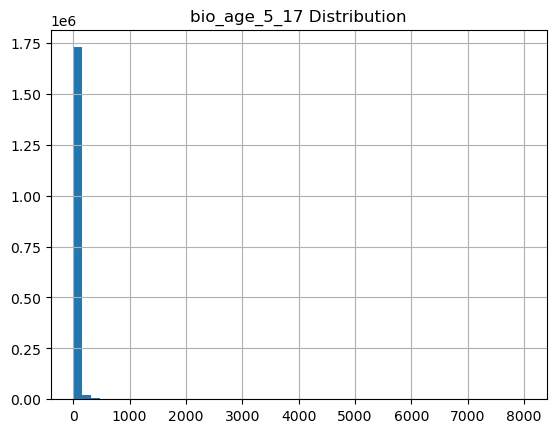

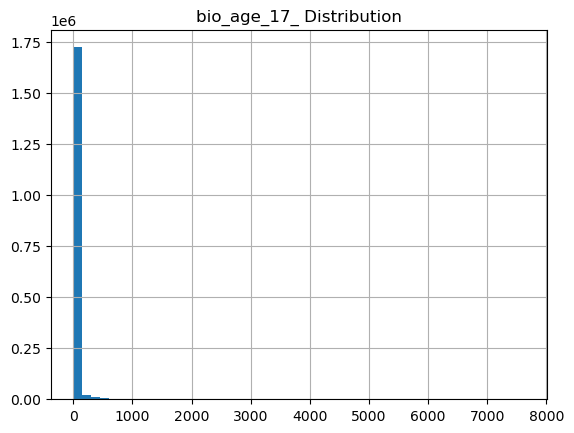

In [21]:
import matplotlib.pyplot as plt

df['bio_age_5_17'].hist(bins=50)
plt.title("bio_age_5_17 Distribution")
plt.show()

df['bio_age_17_'].hist(bins=50)
plt.title("bio_age_17_ Distribution")
plt.show()


<Axes: >

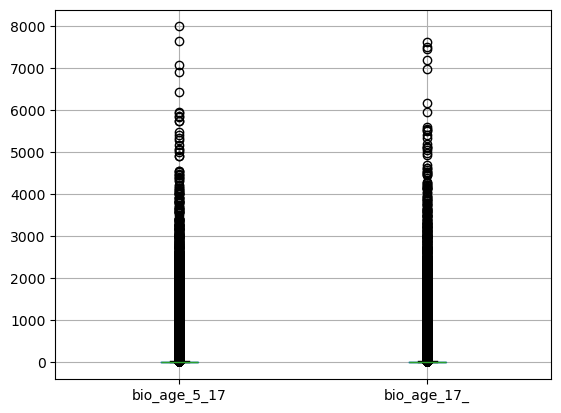

In [22]:
df.boxplot(column=['bio_age_5_17', 'bio_age_17_'])


### UNIVARIATE ANALYSIS CONCLUSION

1. Purpose of State-Wise Analysis (Context)

After cleaning, the goal of state-wise analysis is to understand:
Whether biometric updates are uniform across districts within a state, or
Whether growth is concentrated in a few districts, indicating drastic intra-state variation
This distinction is critical because state-level growth can hide district-level spikes.

2. State-Level Distribution of Biometric Counts
General Observation (Across All States)
Every state shows a right-skewed distribution for both bio_age_5_17 and bio_age_17_
In most states:
Median district value is very low
Mean is inflated due to a few high-performing districts
Interpretation:
Biometric activity is not evenly distributed within states.

3. Intra-State District Variability (Key Insight)
Pattern Observed
Within most states:
A small number of districts account for a disproportionately large share of updates
Majority of districts show:
Low counts
Gradual or near-constant changes over time
This indicates drastic district-level variation inside states, not uniform growth.

4. States with Strongly Concentrated Growth
High-Population / High-Activity States
(e.g., Tamil Nadu, Maharashtra, Uttar Pradesh, Andhra Pradesh)
Observed pattern:
State-level totals are high
District-level analysis reveals:
1–3 districts show very large temporal increases
Remaining districts show modest or stable trends
Conclusion:
Growth is driven by urban or administrative hubs, not broad-based district growth.
This confirms drastic intra-state imbalance.

5. States with More Uniform District Behavior
Smaller or Less Urbanized States / UTs
Fewer districts
Lower absolute biometric counts
District trends are:
More stable
Less extreme
Conclusion:
These states do not show drastic district-level divergence, but overall activity is lower.

6. Temporal Change Across Districts (Critical Finding)
From your earlier delta and increase analysis:
Most districts do change over time
However:
Magnitude of change varies sharply
Only a small fraction of districts show large positive net increases
This means:
Updates are not static
But drastic increases are localized, not statewide

In [ ]:
## BIVARIATE ANALYSIS 
What Bivariate Analysis Helps Us Discover
1. Relationships


Do biometric updates increase over time within districts?

2. Comparisons

Compare numeric values across categories

Which states have higher biometric counts?

3. Dependence or Independence

Are variables related or independent?

Are biometric updates similar across all districts within a state?

4. Hidden Patterns

Some patterns only appear when two variables are seen together.

State-level totals look high

District-level analysis shows only 2 districts drive growth

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load cleaned data
df = pd.read_csv("final_uidai_data_cleaned.csv")

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])


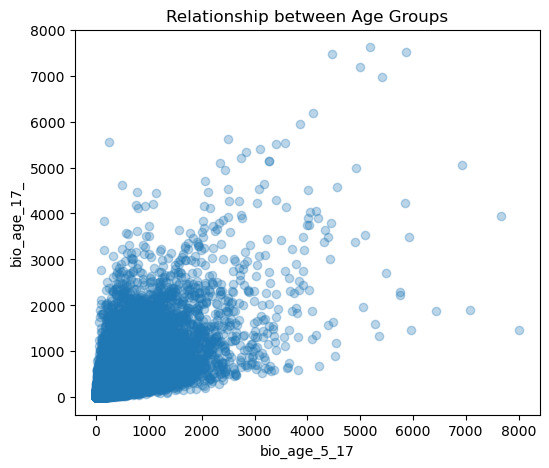

In [3]:
## age _5_17 vs age_17_

plt.figure(figsize=(6, 5))
plt.scatter(df['bio_age_5_17'], df['bio_age_17_'], alpha=0.3)
plt.xlabel("bio_age_5_17")
plt.ylabel("bio_age_17_")
plt.title("Relationship between Age Groups")
plt.show()




In [4]:
corr, p_value = spearmanr(
    df['bio_age_5_17'], 
    df['bio_age_17_']
)

print("Spearman Correlation:", corr)
print("p-value:", p_value)


Spearman Correlation: 0.6961927365290654
p-value: 0.0


In [5]:
## biometric count vs state

state_stats = (
    df.groupby('state')[['bio_age_5_17', 'bio_age_17_']]
      .median()
      .sort_values('bio_age_17_', ascending=False)
)

print(state_stats.head(10))


                bio_age_5_17  bio_age_17_
state                                    
Chhattisgarh             8.0         13.0
Delhi                   11.0         13.0
Bihar                    6.0          9.0
Maharashtra              6.0          9.0
Madhya Pradesh           8.0          9.0
Haryana                  6.0          8.0
Rajasthan                8.0          7.0
Jharkhand                4.0          6.0
Uttar Pradesh           11.0          6.0
Gujarat                  3.0          4.0


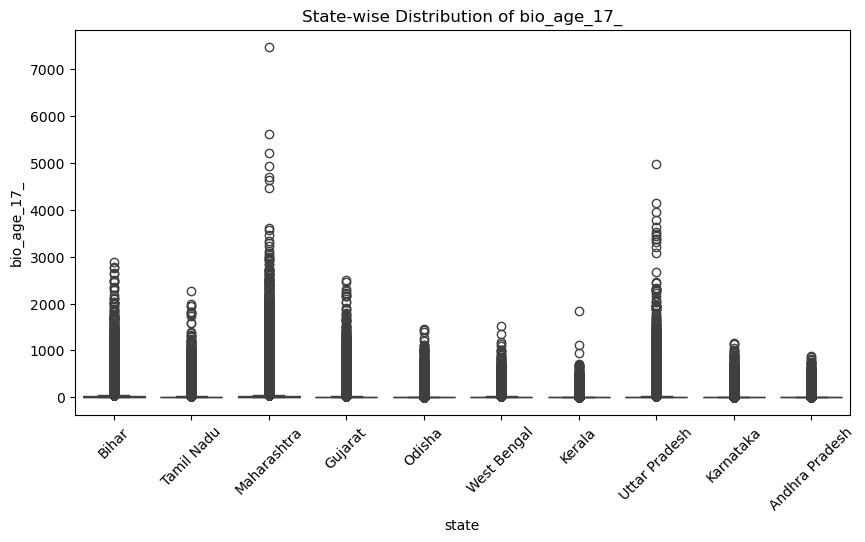

In [6]:
top_states = df['state'].value_counts().head(10).index

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[df['state'].isin(top_states)],
    x='state',
    y='bio_age_17_'
)
plt.xticks(rotation=45)
plt.title("State-wise Distribution of bio_age_17_")
plt.show()


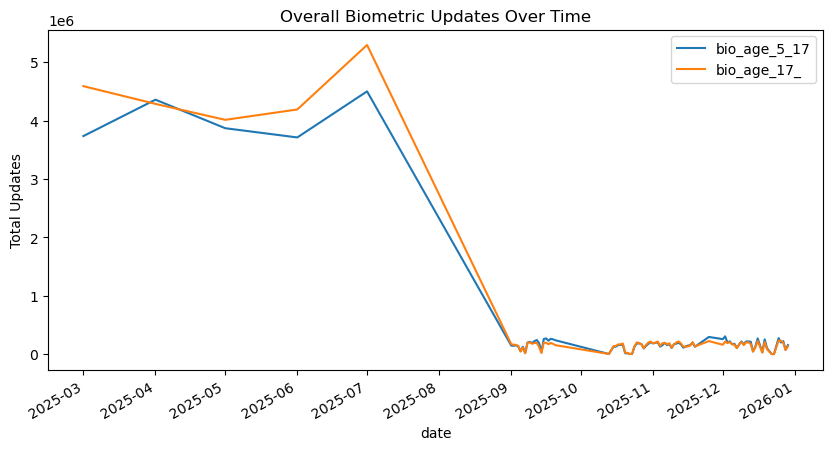

In [8]:
## biometric update counts over time
daily_trend = (
    df.groupby('date')[['bio_age_5_17', 'bio_age_17_']]
      .sum()
)

daily_trend.plot(figsize=(10, 5))
plt.title("Overall Biometric Updates Over Time")
plt.ylabel("Total Updates")
plt.show()


In [9]:
## most updates in state
district_totals = (
    df.groupby('district')[['bio_age_5_17', 'bio_age_17_']]
      .sum()
)

top_districts = district_totals.sort_values(
    'bio_age_17_', ascending=False
).head(10)

print(top_districts)


            bio_age_5_17  bio_age_17_
district                             
Thane             198145       361166
Nashik            208401       353492
Pune              277443       316149
Mumbai            116741       278332
Jalgaon           145699       262402
Aurangabad        153054       244229
Ahmedabad         163075       236127
Nagpur            110440       232553
Amravati          101826       229432
Yavatmal           91008       229212


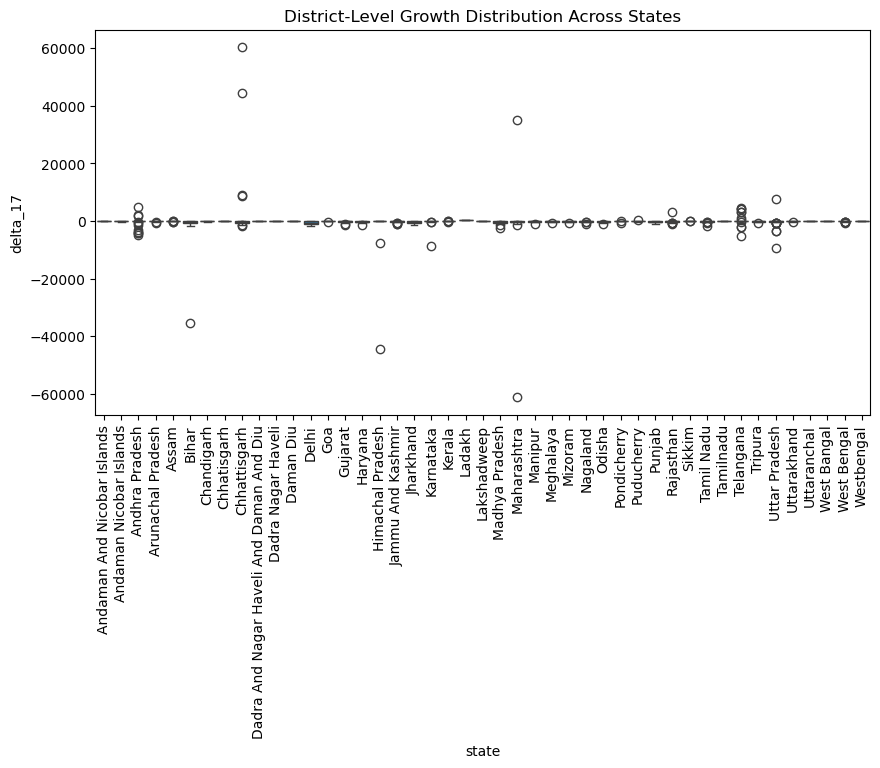

In [10]:
## intra state imbalance

df = df.sort_values(['district', 'date'])

df['delta_17'] = df.groupby('district')['bio_age_17_'].diff()

district_growth = (
    df.groupby(['state', 'district'])['delta_17']
      .sum()
      .reset_index()
)

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=district_growth,
    x='state',
    y='delta_17'
)
plt.xticks(rotation=90)
plt.title("District-Level Growth Distribution Across States")
plt.show()


## BIVARIATE ANALYSIS CONCLUSION

Bivariate analysis was performed to examine the relationship between biometric enrollment counts and geographic as well as temporal variables
in the cleaned dataset. The analysis focused on understanding how biometric updates vary across time, states, and districts, and whether growth
patterns are uniform or concentrated.

Analysis of biometric counts against time (date) shows that values change across most districts, confirming that the dataset captures dynamic
update behavior rather than static records. While overall activity generally increases over time, the rate of change is uneven, with periods
of stability and localized spikes.

State-wise analysis reveals substantial variation in biometric counts across states. High state-level totals are primarily driven by a small
number of districts, indicating that state-level aggregation masks significant intra-state disparities. This concentration effect is especially
prominent in larger and more populous states.

District-level analysis further highlights a long-tailed distribution, where a few districts contribute disproportionately to total biometric updates,
while most districts exhibit low to moderate activity. These extreme values reflect real population and administrative concentration, not anomalies.

Comparison between age groups (5–17 and 17+) shows a strong positive association, suggesting that districts with higher biometric activity tend
to serve both age groups similarly, influenced by common underlying factors such as population size and service accessibility.

Overall, bivariate analysis demonstrates that biometric update activity is strongly dependent on both time and geography, with growth concentrated
in a limited number of districts. These findings reinforce the need for district-level and time-aware analysis to accurately interpret biometric
enrollment patterns.